<a href="https://colab.research.google.com/github/stepsbtw/Statistical-Inference/blob/main/Statistical_Inference/06_teste_de_normalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testes de Normalidade
Grande parte dos testes de hipóteses (ex : t de Student?) possuem como premissa:

1. As amostras precisam ser normalmente distribuídas
2. As amostras devem ser grandes (n>30)

Os **testes de normalidade** são usados justamente pra verificar se o conjunto de dados é associado com uma distribuição de probabilidade que pode ser aproximada por uma distribuição normal.

*As amostras vieram de uma normal?*

- Existem diversas abordagens, as quais podem ser usadas mutuamente. E são divididas em duas principais famílias: **visuais** e **estatísticos**.

**Testes Visuais**
- Q-Q plot (quantile-quantile plot)
- Histograma
- Box Plot

**Testes Estatísticos**
- Teste de D'Agostino
- Teste de Shapiro-Wilk

# QQ-plot
Considere uma variável aleatória que siga a distribuicao normal.

Podemos **Padronizar** essa variável para que tenha média 0 e desvio 1.

- Considere F(.) e Phi(.) são as funções de distribuição acumuladas de X e Z.

  - F(x) = Pr(X<=x) = Pr(Z<= x-mux/sigmax) = Phi(x-mux/sigmax)

- Portanto, aplicar a Phi^-1 (inversa):
  - Phi^-1(F(x)) = x-mux/sigmax

- Maniuplar algébricamente e obtemos:
  - x = sigmax * Phi^-1(F(x)) + mux

Isso nos dá uma relação linear entre x e Phi^-1(F(x)) onde o desvio padrão da variável representa a inclinação e a média representa o deslocamento.

### Exemplo
Dada uma amostra x1, ..., xn de X, a variável que queremos checar se vem da distribuição normal.

Caso ela venha de uma distribuição normal, devemos esperar a tendência linear quando produzir o grafico dos pontos:

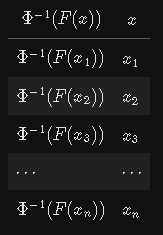

### Passo a Passo para construir o QQ-plot
1. Amostra x1,..., xn
2. Elementos ordenados x(1) <= x(2) <= ... <= x(n)
3. Calcule n valores 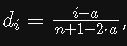 para i = 1,...,n
4. Calcule os quantis da dist normal padrão para cada di:
  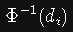
5. Desenhe o Gráfico.

**OBS:** alpha = 3/8 se n<= 10, alpha = 1/2 se n>10
Necessário pois caso image.png então 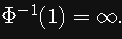

### Conclusão
Com o gráfico desenhado, quanto mais "linear" for o gráfico, mais próxima a variável aleatória que gerou a amostra está de uma normal.

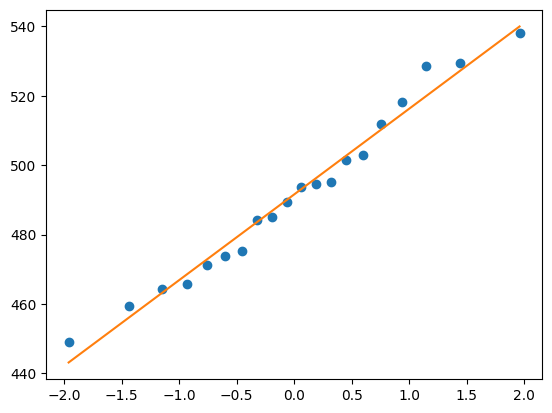

In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

def phi_inversa(amostra):
  n = amostra.shape[0]
  if(n <= 10):
    alpha = 3/8
  else:
    alpha = 0.5
  i = np.arange(start=1, stop=n+1)
  d_i = (i-alpha) / (n+1 - 2*alpha)
  return st.norm.ppf(d_i)

amostra = np.array([484.11, 459.49, 471.38, 512.01, 494.48, 528.63, 493.64, 485.03, 473.88, 501.59, 502.85, 538.08, 465.68, 495.03, 475.32, 529.41, 518.13, 464.32, 449.08, 489.27])
amostra = np.sort(amostra)

x = phi_inversa(amostra)

plt.plot(x, amostra, "o")

# ajusta uma reta sobre os pontos da amostra para facilitar a inspeção visual.
inclinacao, constante, a, b, c = st.linregress(x, amostra)
y = inclinacao * x + constante
plt.plot(x, y)

plt.show()

Esse gráfico representa o plot de **probabilidades**, que pode ser feito direto com o scipy.

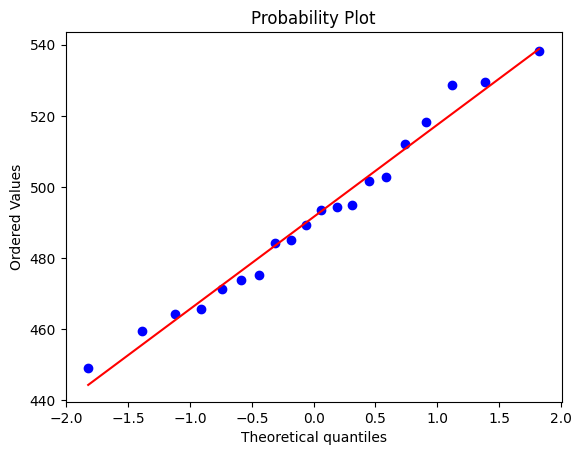

In [ ]:
st.probplot(amostra, plot=plt)
plt.show()

Exemplo : Amostra Sintética

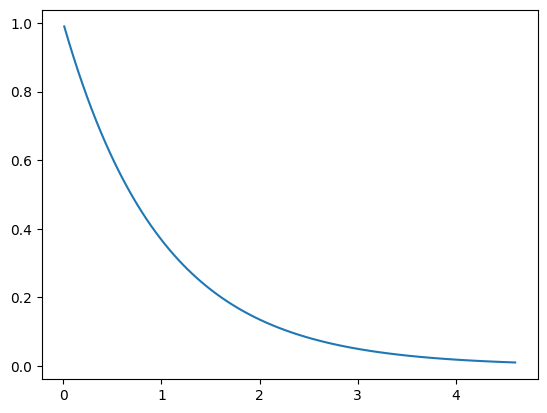

In [ ]:
from scipy.stats import expon
x = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100)
plt.plot(x, expon.pdf(x))

Agora, checar se as amostras retiradas da exponencial serao normais:

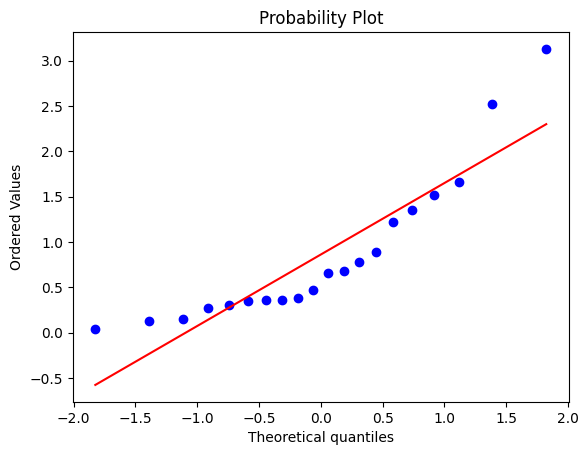

In [ ]:
r = expon.rvs(size=20) # tirando uma amostra de tamanho 20 da distribuicao exponencial
'''
rvs : random variates (variavel aleatoria)
'''
st.probplot(r, plot=plt)
plt.show()

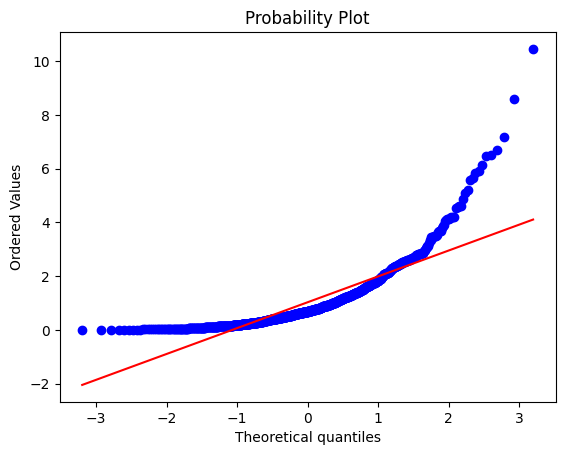

In [ ]:
r = expon.rvs(size=1000)
st.probplot(r,plot=plt)
plt.show()

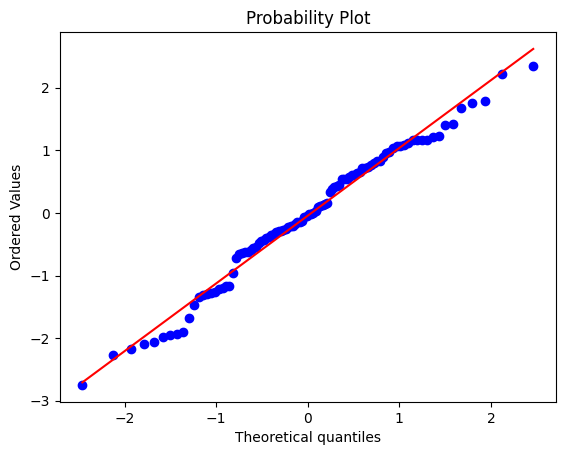

In [ ]:
import numpy as np

#test = np.random.normal(0,1,1000)
test = np.random.randn(100)

st.probplot(test, plot=plt)

plt.show()

# Histograma
Investigar se a amostra possui um gráfico de densidade aproximadamente normal.

Seaborn fornece a funcao **displot** que faz isso.

Utilizar a APROXIMAÇÃO da função de densidade da amostra.

**KDE - Kernel Density Estimation**

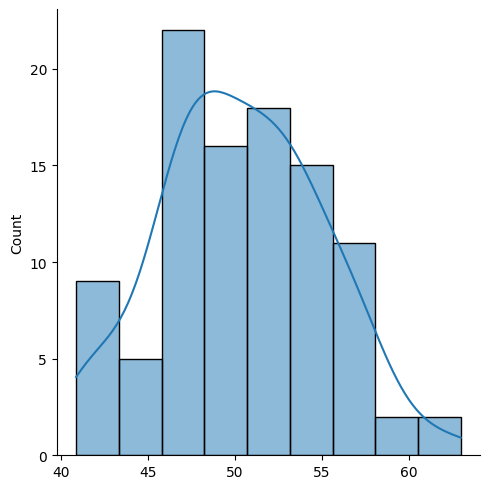

In [ ]:
import seaborn as sns
from numpy.random import randn

x = 5 * randn(100) + 50 # desvio padrao 5 e media 50
sns.displot(x, kde=True)

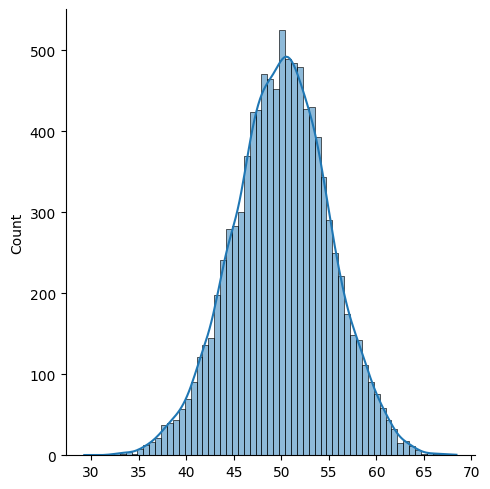

In [92]:
x = 5 * randn(10000) + 50
sns.displot(x, kde=True)

# Quanto maior a amostra mais ela se aproxima do KDE original.

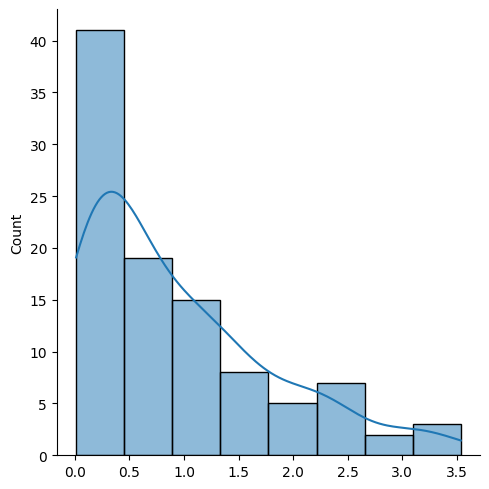

In [ ]:
from numpy.random import exponential

x = exponential(size=100)
sns.displot(x, kde=True)

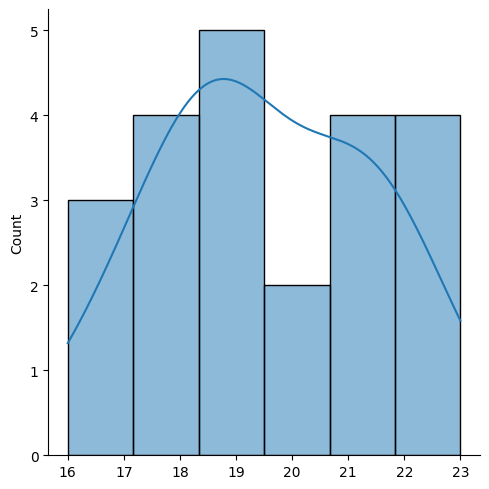

In [ ]:
amostra = np.array([18,19,22,22,19,16,21,21,21,20,17,18,18,17,19,19,18,21,23,19,22,20])
sns.displot(amostra, kde=True)

# Box Plot
Caso a amostra seja proveniente de uma distribuição normal, teremos um pequeno número de **OUTLIERS**.

( A probabilidade de um ponto estar muito distante da média é baixo. )

Além disso, a média e a mediana devem estar localizadas na parte **CENTRAL** do gráfico.

<Axes: >

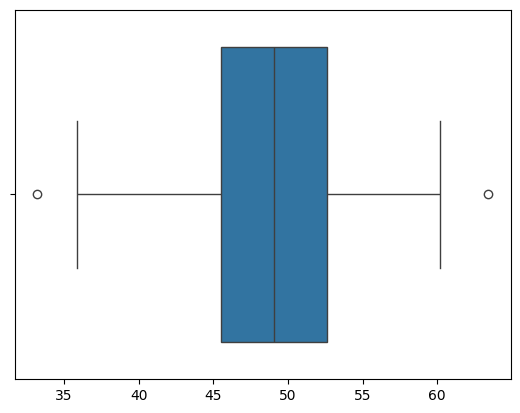

In [130]:
#Tx = 5 * randn(100) + 50
sns.boxplot(x=x)

<Axes: >

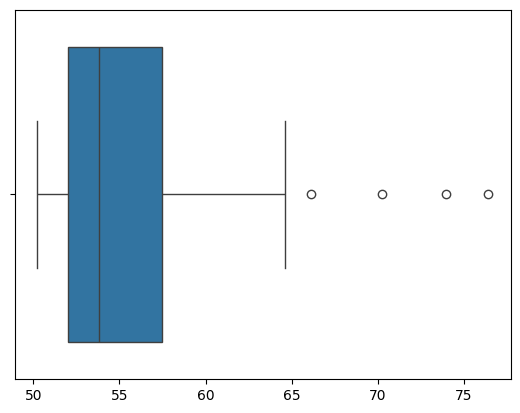

In [126]:
x = 5 * exponential(size=100) + 50
sns.boxplot(x=x)

# Testes Estatísticos
Hipótese: A amostra É proveniente de uma distribuição normal.

Para verificar a normalidade de uma amostra, é preciso:
- Comparar p com o **nível de significância** (alpha = 0.05 normalmente)
- Se p < alpha : A amostra não provem de uma normal.

# Teste de D'Agostino
Combina dois sumários estatísticos calculados a partir da amostra, pra saber se a amostra se **afasta** de uma normal.

- skewness (assimetria) é a medida de quão intensamente a distribuição é jogada para esquerda ou direita
- kurtosis (curtose) é a medida do quanto da distribuição está nas caudas.a

No scipy, a função **normaltest** implementa o D'Agostino.

Dada uma amostra x, a função retorna um par de valores numéricos:
1. O valor da estatística de teste usada.
2. O valor p associado.

**p** representa a **probabilidade** de um valor da estatística **tão grande ou maior** (do que a normal) seja produzido ao acaso.

Caso o p seja muito pequeno, significa que é **improvável** que os dados sejam originários da distribuição normal.

In [136]:
from scipy.stats import normaltest

def apply_normaltest(x):
  k2, p = normaltest(x)
  alpha = 0.05
  print(f"p = {p}")

  if p < alpha: # HIPOTESE: x é proveniente de uma normal
    print("A hipótese PODE ser rejeitada.")
  else:
    print("A hipótese PODE NÃO ser rejeitada.")

amostra = np.array([18,19,22,22,19,16,21,21,21,20,17,18,18,17,19,19,18,21,23,19,22,20])
apply_normaltest(amostra)

p = 0.5770887319493623
A hipótese PODE NÃO ser rejeitada.


In [139]:
amostra = st.uniform.rvs(size=100)
apply_normaltest(amostra)

p = 7.015726917399128e-06
A hipótese PODE ser rejeitada.


#Teste de Shapiro-Wilk

In [141]:
from scipy.stats import shapiro

def apply_normaltest(x):
  k2, p = shapiro(x)
  alpha = .05
  print("p = {:g}".format(p))

  if p < alpha:  # H_0: x é proveniente de uma distribuição normal
    print("A hipótese nula pode ser rejeitada")
  else:
    print("A hipótese nula pode NÃO ser rejeitada")

amostra   = np.array([18,19,22,22,19,16,21,21,21,20,17,18,18,17,19,19,18,21])

apply_normaltest(amostra)

p = 0.267872
A hipótese nula pode NÃO ser rejeitada
